In [1]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from model.model import bayesian_model

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) 

plt.rcParams['font.family'] ='AppleGothic'
plt.rcParams['axes.unicode_minus'] =False

/Users/jaeminiman/anaconda3/envs/pytorch/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
model = bayesian_model('./results/parameters.pkl')

In [3]:
model.predict

<bound method bayesian_model.predict of <model.model.bayesian_model object at 0x153271fd0>>

#### 예시 경기 : 전북 VS 울산 (하나은행 k-league 4round)
- 경기일 : 2024/03/30
- 홈팀 : 전북
- 결과 : 2:2

In [4]:
 
event_str = """
후반 50분  후반종료
후반 49분  울산 : (27)이청용 코너킥
후반 46분  울산 : (8)이규성 골키퍼선방
후반 44분  전북 : (28)맹성웅 파울
후반 43분  전북 : (25)최철순 파울
후반 42분  전북 : (39)김태환 교체 - (25)최철순 IN
후반 42분  전북 : (9)티아고 교체 - (30)이규동 IN
후반 41분  울산 : (8)이규성 코너킥
후반 37분  울산 : (27)이청용 코너킥
후반 33분  울산 : (6)보야니치 교체 - (27)이청용 IN
후반 32분  울산 : (13)이명재 슈팅
후반 31분  전북 : (27)문선민 슈팅
후반 30분  전북 : (11)이동준 슈팅
후반 25분  울산 : (10)김민우 교체 - (28)장시영 IN
후반 24분  전북 : (27)문선민 득점 / [도움] (9)티아고
후반 23분  울산 : (21)조현우 경고 (경기지연)
후반 22분  전북 : (11)이동준 슈팅
후반 22분  전북 : (23)김진수 코너킥
후반 20분  울산 : (10)김민우 파울
후반 19분  전북 : (28)맹성웅 파울
후반 18분  전북 : (6)이수빈 교체 - (28)맹성웅 IN
후반 17분  울산 : (10)김민우 코너킥
후반 16분  전북 : (11)이동준 경고 (항의)
후반 14분  울산 : (11)엄원상 골키퍼선방
후반 14분  울산 : (14)이동경 교체 - (11)엄원상 IN
후반 14분  울산 : (96)김지현 교체 - (18)주민규 IN
후반 13분  전북 : (11)이동준 오프사이드
후반 13분  울산 : (8)이규성 슈팅
후반 12분  울산 : (96)김지현 슈팅
후반 11분  전북 : (15)구자룡 파울
후반 10분  전북 : (11)이동준 슈팅
후반 08분  울산 : (14)이동경 코너킥
후반 05분  울산 : (96)김지현 슈팅
후반 04분  전북 : (6)이수빈 파울
후반 04분  전북 : (11)이동준 파울
후반 02분  전북 : (9)티아고 포스트바 맏은 슈팅
후반 01분  울산 : (21)조현우 파울
후반 30초  울산 : (20)황석호 파울
후반 00초  전북 : (29)이지훈 교체 - (27)문선민 IN
후반 00초  울산 : (70)최강민 교체 - (66)설영우 IN
후반  후반시작
전반 50분  전반종료
전반 48분  전북 : (23)김진수 코너킥
전반 48분  전북 : (15)구자룡 슈팅
전반 48분  전북 : (23)김진수 코너킥
전반 47분  전북 : (9)티아고 슈팅
전반 46분  전북 : (11)이동준 득점 / [도움] (23)김진수
전반 44분  전북 : (11)이동준 파울
전반 43분  울산 : (10)김민우 파울
전반 42분  울산 : (14)이동경 슈팅
전반 39분  울산 : (96)김지현 득점 / [도움] (8)이규성
전반 38분  전북 : (11)이동준 파울
전반 35분  전북 : (6)이수빈 경고 (지속적 경기규칙 위반)
전반 35분  전북 : (6)이수빈 파울
전반 33분  전북 : (3)정태욱 파울
전반 30분  울산 : (13)이명재 파울
전반 25분  전북 : (23)김진수 코너킥
전반 24분  전북 : (23)김진수 골키퍼선방
전반 23분  울산 : (6)보야니치 파울
전반 21분  울산 : (14)이동경 득점
전반 20분  울산 : (96)김지현 슈팅
전반 17분  울산 : (14)이동경 슈팅
전반 15분  울산 : (14)이동경 오프사이드
전반 11분  울산 : (14)이동경 파울
전반 09분  전북 : (11)이동준 슈팅
전반 08분  전북 : (9)티아고 슈팅
전반 08분  전북 : (4)박진섭 파울
전반 06분  전북 : (6)이수빈 파울
전반 05분  울산 : (20)황석호 경고 (경기지연)
전반 05분  울산 : (20)황석호 파울
전반 05분  울산 : (14)이동경 코너킥
전반 04분  전북 : (26)홍정호 교체 - (3)정태욱 IN
전반 03분  울산 : (17)루빅손 포스트바 맏은 슈팅
전반 01분  울산 : (20)황석호 파울
"""

In [5]:
home_team = '전북'
away_team = '울산'
events = event_str.split('\n')
event_df = []
for e in events :
    if  len(re.findall('코너킥|파울|골키퍼선방|코너킥|슈팅|득점|경고|퇴장', e)) > 0:
        period = e.split(' ')[0]
        minute = e.split(' ')[1].split('분')[0]
        event = re.findall('코너킥|파울|골키퍼선방|코너킥|슈팅|득점|경고|퇴장', e)[0]
        if '초' in minute:
            minute = 0

        period_dict = {'전반':1, '후반':2}
        event_dict = {'코너킥':'Corner', '파울':'Foul Committed','슈팅':'Shot', 
                      '득점':'Goal', '경고':'Yellow Card', '퇴장':'Red Card', '골키퍼선방' :'Shot'}
        t_df = {'period' : period_dict[period], 'minute' : int(minute), 'feature_type': event_dict[event]}
        if len(re.findall(home_team, e)) > 0:
            t_df['team_name'] = home_team
            event_df.append(t_df)
        elif len(re.findall(away_team, e)) > 0:
            t_df['team_name'] = away_team
            event_df.append(t_df)
event_df = pd.DataFrame(event_df)

In [6]:
def time_seg(minute, period):
    # 전반(10), 후반(10) 하여 1-20 frame 으로 분할
    if period == 1:
        seg = minute // 5
        if seg >= 10 :
            seg = 9
    else : 
        seg = minute // 5
        if seg <= 9 :
            seg = 10
        elif seg >= 20:
            seg = 19
    return seg+1

In [7]:
def game_state_preprocessing(event_df, result_df):
    # home & awayteam
    home_team = result_df['home_team']
    away_team = result_df['away_team']

    # 전체 누적 값, 이전 10분 값 columns 구분하여 전처리
    cumsum_col = ['Goal', 'Yellow Card', 'Red Card']
    rangesum_col = ['Corner', 'Foul Committed', 'Shot', 'Pass Offside']


    t_event_event = event_df.copy()
    t_event_event['frame'] = [time_seg(t_event_event['minute'].iloc[i], t_event_event['period'].iloc[i]) for i in range(len(t_event_event))]
    table = pd.pivot_table(t_event_event, values ='period', index=['team_name', 'frame'],
                        columns=['feature_type'], aggfunc="count").fillna(0)

    # 해당 경기에서 발생하지 않은 이벤트 column 추가
    table[list(set(cumsum_col + rangesum_col).difference(table.columns))] = 0
    table = table[['Yellow Card', 'Red Card', 'Goal', 'Corner', 'Foul Committed', 'Shot', 'Pass Offside']]
    # 슛팅 숫자 = 슛 이벤트 + 골 이벤트
    table['Shot'] = table['Shot'] + table['Goal']

    h_table = table.loc[[j[0] == home_team for j in table.index]].reset_index('frame').set_index('frame')
    a_table = table.loc[[j[0] == away_team for j in table.index]].reset_index('frame').set_index('frame')
    
    zero_df = pd.DataFrame(columns=table.columns, index=np.arange(1,21), data=0)
    h_table = zero_df + h_table
    a_table = zero_df + a_table
    h_table.fillna(0, inplace=True)
    a_table.fillna(0, inplace=True)

    h_table[cumsum_col] = h_table[cumsum_col].cumsum()
    h_table[rangesum_col] = h_table[rangesum_col] + h_table[rangesum_col].shift(1).fillna(0)

    a_table[cumsum_col] = a_table[cumsum_col].cumsum()
    a_table[rangesum_col] = a_table[rangesum_col] + a_table[rangesum_col].shift(1).fillna(0)

    return h_table, a_table

In [8]:
h_table, a_table = game_state_preprocessing(event_df, {'home_team':'전북', 'away_team':'울산'})

In [9]:
a_table.head()

feature_type,Yellow Card,Red Card,Goal,Corner,Foul Committed,Shot,Pass Offside
1,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,1.0,0.0,0.0,1.0,2.0,1.0,0.0
3,1.0,0.0,0.0,1.0,2.0,0.0,0.0
4,1.0,0.0,0.0,0.0,1.0,1.0,0.0
5,1.0,0.0,1.0,0.0,1.0,3.0,0.0


#### Elo rating
- 작년 순위 : 전북(4), 울산(1)

In [10]:
# 전북 4위 
h_elo = 1200 + (600*(13-4)/12)
# 울산 1위
a_elo = 1200 + (600*(13-1)/12)
print("홈팀 전북(4위) : {}, 어웨이팀 울산(1위) : {}".format(h_elo, a_elo))

홈팀 전북(4위) : 1650.0, 어웨이팀 울산(1위) : 1800.0


In [11]:
h_table['elo_diff'] = (h_elo-a_elo)/100
h_table['goal diff'] = h_table['Goal'] - a_table['Goal']
a_table['elo_diff'] = (a_elo-h_elo)/100
a_table['goal diff'] = a_table['Goal'] - h_table['Goal']

In [12]:
h_table.head()

feature_type,Yellow Card,Red Card,Goal,Corner,Foul Committed,Shot,Pass Offside,elo_diff,goal diff
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.5,0.0
2,0.0,0.0,0.0,0.0,2.0,2.0,0.0,-1.5,0.0
3,0.0,0.0,0.0,0.0,2.0,2.0,0.0,-1.5,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.5,0.0
5,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-1.5,-1.0


#### 예측 결과

In [13]:
results = [model.predict(h_table.loc[i].values, a_table.loc[i].values, i) for i in range(1,20)]

In [14]:
results_df = pd.DataFrame()
w = np.array([i[0] for i in results])
d = np.array([i[1] for i in results])
l = 1 - w - d

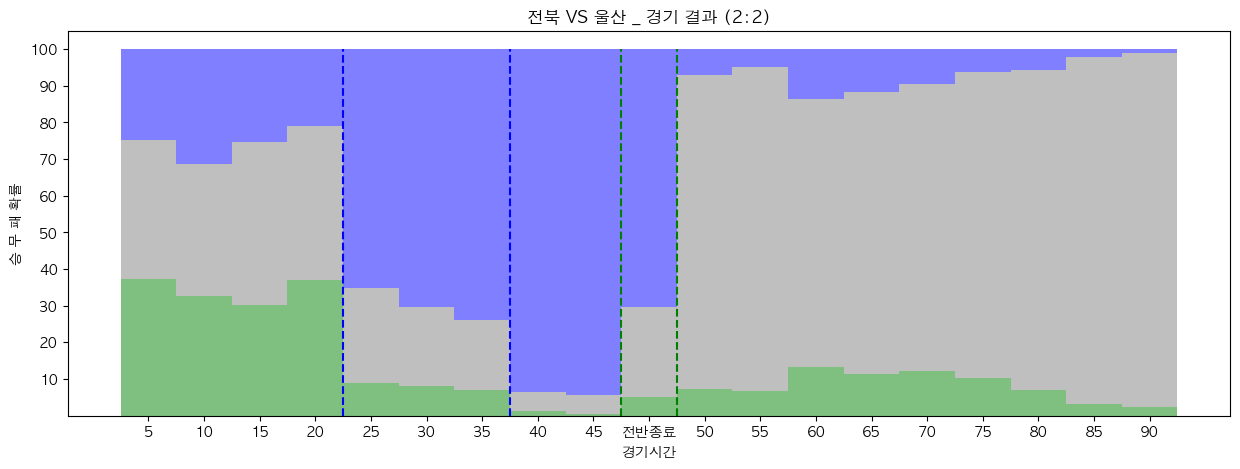

In [32]:
fig = plt.figure(figsize=(15,5))
plt.bar(x=range(1,20), height=w, color='green', alpha=0.5, width=1)
plt.bar(x=range(1,20), height=d, bottom=w, color ='gray', alpha=0.5, width=1)
plt.bar(x=range(1,20), height=l, bottom=w+d, color='blue', alpha=0.5, width=1)

plt.xticks(range(1,20), [5, 10, 15, 20, 25, 30, 35, 40, 45, '전반종료',
                         50, 55, 60, 65, 70, 75, 80, 85, 90])
plt.xlabel('경기시간')
plt.yticks(np.arange(0.1,1.1,0.1), [10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
plt.ylabel('승 무 패 확률')
plt.vlines(4.5, ymin=0, ymax=1, linestyles='dashed', colors='blue')
plt.vlines(7.5, ymin=0, ymax=1, linestyles='dashed', colors='blue')
plt.vlines(9.5, ymin=0, ymax=1, linestyles='dashed', colors='green')
plt.vlines(10.5, ymin=0, ymax=1, linestyles='dashed', colors='green')
plt.title('전북 VS 울산 _ 경기 결과 (2:2)');